<a href="https://colab.research.google.com/github/erfanbyt/pytorch/blob/main/Image_classification_with_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# download the training data
dataset = MNIST(root='data/', download=True)

In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

#### exploring the dataset

In [ ]:
dataset[0]  # (image type, label)

(<PIL.Image.Image image mode=L size=28x28 at 0x7F3C708225B0>, 5)

Label 5


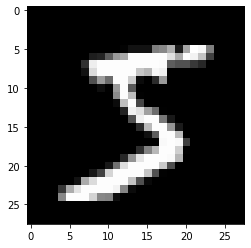

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label', label)

#### preparing the dataset

pytorch can't work with the PIL format data and it requires the tensor data --> conversion needed

In [ ]:
import torchvision.transforms as transforms

applying the transformation when the images are loaded

In [ ]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


#### training and validation datasets

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
print(len(train_ds), len(val_ds))

50000 10000


In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

#### model

In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# logestic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0022, -0.0335, -0.0293,  ..., -0.0037, -0.0094, -0.0305],
        [ 0.0342,  0.0114, -0.0270,  ...,  0.0323,  0.0338, -0.0054],
        [ 0.0234, -0.0188,  0.0286,  ..., -0.0074, -0.0206, -0.0056],
        ...,
        [ 0.0067,  0.0341,  0.0200,  ...,  0.0002,  0.0278,  0.0274],
        [ 0.0279,  0.0229, -0.0248,  ...,  0.0161, -0.0155,  0.0346],
        [-0.0144,  0.0174, -0.0029,  ...,  0.0185, -0.0329,  0.0079]],
       requires_grad=True)


In [ ]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([ 0.0112, -0.0259, -0.0298,  0.0116,  0.0138,  0.0173,  0.0014, -0.0112,
        -0.0287, -0.0353], requires_grad=True)


In [ ]:
# for images, labels in train_loader:
#     print(labels)
#     print(images.shape)
#     outputs = model(images.reshape(-1, 784))  # flatten the input
#     print(outputs)
#     break

tensor([8, 3, 2, 6, 4, 8, 7, 9, 5, 1, 8, 0, 1, 5, 4, 1, 3, 5, 9, 8, 8, 4, 8, 0,
        9, 5, 8, 8, 0, 4, 7, 5, 6, 2, 5, 9, 8, 0, 0, 3, 9, 8, 7, 4, 2, 4, 4, 1,
        2, 5, 9, 4, 2, 1, 4, 4, 3, 8, 0, 8, 0, 7, 5, 5, 2, 8, 5, 7, 6, 6, 5, 3,
        6, 4, 9, 2, 5, 4, 9, 2, 2, 6, 3, 3, 9, 3, 3, 3, 4, 5, 4, 5, 9, 0, 5, 0,
        6, 0, 7, 3, 7, 0, 5, 5, 6, 8, 3, 3, 5, 9, 8, 4, 0, 0, 8, 1, 8, 6, 2, 8,
        5, 0, 7, 7, 3, 3, 7, 1])
torch.Size([128, 1, 28, 28])
tensor([[-0.1534, -0.1993, -0.1482,  ..., -0.1043, -0.4428,  0.1797],
        [ 0.1209,  0.1583, -0.2673,  ..., -0.1028,  0.1508,  0.0498],
        [-0.1159,  0.0586, -0.0678,  ...,  0.0017, -0.1331,  0.6517],
        ...,
        [ 0.0550,  0.0144, -0.1484,  ...,  0.1130,  0.1847,  0.2570],
        [ 0.1179, -0.3254,  0.0511,  ..., -0.0346,  0.0621,  0.0408],
        [ 0.0906, -0.0943, -0.0989,  ...,  0.0909, -0.1086,  0.2153]],
       grad_fn=<AddmmBackward0>)


## Creating a class to do all the operations

In [ ]:
class MNISTModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out


In [ ]:
model = MNISTModel()

In [ ]:
print(model.linear.weight.shape)

torch.Size([10, 784])


In [ ]:
for images, labels in train_loader:
  outputs = model(images)
  break

In [ ]:
outputs[0]

tensor([ 0.4289, -0.0969, -0.2850,  0.1589,  0.1175,  0.0234,  0.1890, -0.1181,
         0.1604,  0.1569], grad_fn=<SelectBackward0>)

#### implementing softmax function

In [ ]:
import torch.nn.functional as F

In [ ]:
# applying softmax to the output
probs = F.softmax(outputs, dim=1)

print(probs[0])
print(torch.sum(probs[0]))  # sums up to 1

tensor([0.1402, 0.0828, 0.0686, 0.1070, 0.1027, 0.0934, 0.1103, 0.0811, 0.1072,
        0.1068], grad_fn=<SelectBackward0>)
tensor(1.0000, grad_fn=<SumBackward0>)


#### doing the prediction -- getting argmax

In [ ]:
max_prob, pred = torch.max(probs, dim=1)

print(max_prob[0].item(), pred[0])

0.14015550911426544 tensor(0)


#### Evaluation matric and loss function

accuracy is a good evaluation metric but can't be used for the derivative and backpropagation.

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item() / len(preds)

In [ ]:
# cross entropy internally has the softmax function
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2963, grad_fn=<NllLossBackward0>)


#### Optimizer

In [ ]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Training the model

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
  """
    Opt is optional and it will be only used for training, not for the validation
  """
  # calculate the loss
  preds = model(xb)
  loss = loss_func(preds, yb)

  if opt is not None:
    # compute the gradients 
    loss.backward()
    # update the parameters
    opt.step()
    # reset the gradients
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    # compute the metric
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [ ]:
def evaluate(model, loss_fn, valid_dl, metric=None):
  with torch.no_grad():
    # pass each batch through the model
    results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb, yb in valid_dl]

    # seperate losses, counts, and metrics
    losses, nums, metrics = zip(*results)

    # total size of the dataset
    total = np.sum(nums)

    # Avg. loss across batches
    avg_loss = np.sum(np.multiply(losses, nums)) / total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics, nums)) / total

  return avg_loss, total, avg_metric

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item() / len(preds)

Checking the performance of the model over the validation set

In [ ]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print(val_loss, total, val_acc)

2.308418416595459 10000 0.1297


In [ ]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):

  for epoch in range(epochs):
    # training 
    for xb, yb in train_dl:
      loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

    # evaluation
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    # print progress
    if metric is not None:
      print('Epoch [{}/{}], loss: {:.4f}'.
            format(epoch+1, epochs, val_loss))
    else:
      print('Epoch [{}/{}], loss: {:.4f}, {}: {:.4f}'
      .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

#### redefining model and optimizer

In [ ]:
model = MNISTModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], loss: 1.0575
Epoch [2/5], loss: 0.9972
Epoch [3/5], loss: 0.9469
Epoch [4/5], loss: 0.9045
Epoch [5/5], loss: 0.8681
